<a href="https://colab.research.google.com/github/Akritichugh/Code_Alpha_Data_Visualisation/blob/main/IPLVisualization2007to2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to IPL Data Analysis

## What is the IPL?
The Indian Premier League (IPL) is a professional Twenty20 cricket league in India. Founded in 2008, it has grown to become one of the most popular and lucrative cricket leagues globally, featuring city-based franchise teams competing in the Twenty20 format.

## Objective of this Analysis
This notebook aims to explore and analyze the provided IPL dataset to gain insights into various aspects of the tournament. The key objectives include:

*   Understanding match outcomes and trends.
*   Analyzing team and player performances.
*   Identifying factors influencing match results.
*   Visualizing key statistics and patterns.

By analyzing this dataset, we hope to uncover interesting facts and trends about the IPL's history and performance.

# Loading the Libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Uploading files

In [ ]:
df1 = pd.read_csv('deliveries.csv')
df2 = pd.read_csv('matches.csv')

# FILE-1 (MATCHES)

In [ ]:
df2.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


## Basic Information - MATCHES

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

### Size of rows and columns of the dataset

In [ ]:
print(f"No. of Rows are {df2.shape[0]} and No. of Columns are {df2.shape[1]} ")

No. of Rows are 1095 and No. of Columns are 20 


In [ ]:
df2.isnull().sum()

,0
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


## Columns in file- matches

In [ ]:
df2.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

# EXPLORATION

## 1. Which team won the most matches?

This question aims to identify the team that has won the highest number of matches throughout all the seasons included in the dataset.
- By counting the occurrences of each team in the 'winner' column, we can determine the most successful team in terms of match victories.

In [ ]:
match_wins = df2['winner'].value_counts()
match_wins

,count
winner,
Mumbai Indians,144
Chennai Super Kings,138
Kolkata Knight Riders,131
Royal Challengers Bangalore,116
Rajasthan Royals,112
Sunrisers Hyderabad,88
Kings XI Punjab,88
Delhi Daredevils,67
Delhi Capitals,48


## 2. Toss Decision Trends

This question explores the trends in toss decisions made by teams throughout the IPL seasons. By analyzing the 'toss_decision' column, we can see how frequently teams choose to bat or field after winning the toss.

In [ ]:
toss_decision = df2['toss_decision'].value_counts()
toss_decision

,count
toss_decision,
field,704
bat,391


## 3. Toss winners VS Match winners

This question investigates the correlation between winning the toss and winning the match to understand if there's a significant advantage in winning the toss.

In [ ]:
count = df2[df2['toss_winner'] == df2['winner']].shape[0]
percentage = (count / df2.shape[0]) * 100
print(f"Percentage of matches where the toss winner was also the match winner: {percentage:.2f}%")

Percentage of matches where the toss winner was also the match winner: 50.59%


## 4. How do teams win? (Runs vs wickets)

This question analyzes the different ways teams have won matches (by runs or wickets) to understand the common patterns of victory in the IPL.

In [ ]:
Wins_result = df2['result'].value_counts()
Wins_result

,count
result,
wickets,578
runs,498
tie,14
no result,5


## 5. Most "Player of the Match" Awards

This question aims to identify the players who have consistently performed well and have been recognized for their contributions by receiving the 'Player of the Match' award most frequently.

In [ ]:
count = df2['player_of_match'].value_counts().head(20)
count

,count
player_of_match,
AB de Villiers,25
CH Gayle,22
RG Sharma,19
V Kohli,18
DA Warner,18
MS Dhoni,17
YK Pathan,16
RA Jadeja,16
SR Watson,16


## 6. Top venues by match count

This question explores the popularity of different venues based on the number of matches hosted in each stadium.

In [ ]:
venue_counts = df2['venue'].value_counts().head(20)
venue_counts

,count
venue,
Eden Gardens,77
Wankhede Stadium,73
M Chinnaswamy Stadium,65
Feroz Shah Kotla,60
"Rajiv Gandhi International Stadium, Uppal",49
"MA Chidambaram Stadium, Chepauk",48
Sawai Mansingh Stadium,47
Dubai International Cricket Stadium,46
"Wankhede Stadium, Mumbai",45


## 7. Team wise win at a venue

This question provides a detailed view of how each team has performed in different cities, highlighting their strengths and weaknesses at specific venues.

In [ ]:
city_team_wins = df2.groupby(['city', 'winner']).size().unstack(fill_value=0)
display(city_team_wins)

winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Gujarat Titans,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Royal Challengers Bengaluru,Sunrisers Hyderabad
city,,,,,,,,,,,,,,,,,,,
Abu Dhabi,4,0,3,0,0,0,2,0,8,0,8,0,0,7,0,0,2,0,3
Ahmedabad,1,0,4,1,0,9,1,0,3,0,1,0,2,10,0,0,2,1,1
Bangalore,4,1,0,3,1,0,5,0,6,0,8,0,0,3,1,0,29,0,2
Bengaluru,2,0,1,0,0,1,0,0,4,2,1,0,0,1,0,0,11,4,1
Bloemfontein,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Cape Town,0,2,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
Centurion,2,2,0,2,0,0,0,0,1,0,1,0,0,2,0,0,2,0,0
Chandigarh,3,0,0,1,2,1,30,0,4,1,5,1,1,3,0,0,5,0,4
Chennai,50,2,2,2,0,0,2,0,5,1,8,1,3,2,0,0,5,0,2


## 8. Count matches per season
Analyze the growth of IPL over the years by creating a line plot of the number of matches played per season using the dataframe `df2`.

### Subtask:
Group the `df2` DataFrame by season and count the number of matches in each season.


In [ ]:
matches_per_season = df2.groupby('season').size()
display(matches_per_season)

,0
season,
2007/08,58
2009,57
2009/10,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


# Visualizations

## 1. Match wins per team (bar plot)

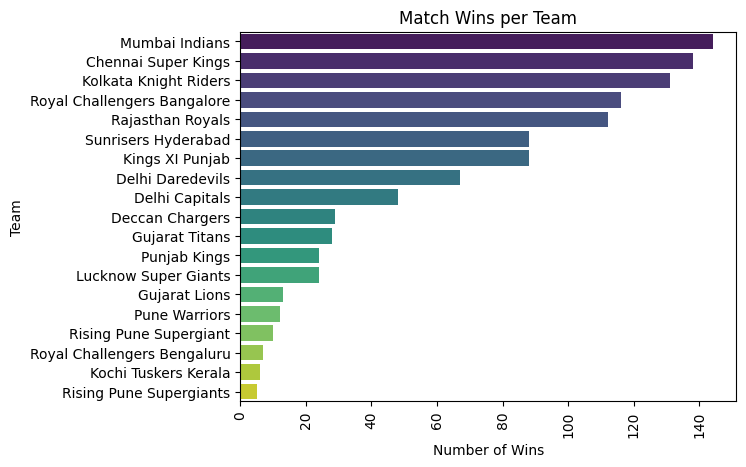

In [ ]:
sns.barplot(y=match_wins.index, x=match_wins.values, palette='viridis')
plt.title('Match Wins per Team')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.xticks(rotation=90)
plt.show()

## Analysis of Team Wins Visualization

*   This bar plot clearly shows that the **Mumbai Indians** are the most successful team in the IPL based on the number of matches won, followed closely by the **Chennai Super Kings** and **Kolkata Knight Riders**.
*   This indicates their consistent performance and dominance throughout the league's history.

## 2. Toss Decisions Trends(piechart)

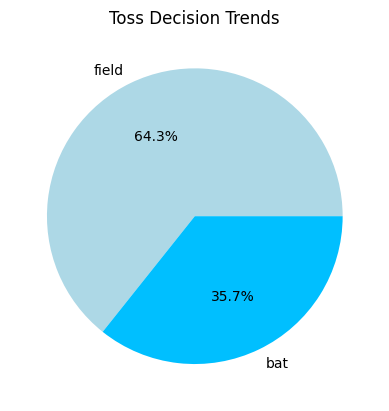

In [ ]:
plt.pie(toss_decision, labels=toss_decision.index, autopct='%1.1f%%', colors=['lightblue', 'deepskyblue'])
plt.title('Toss Decision Trends')
plt.show()

## Analysis of Toss Decision Trends Visualization

*   The pie chart illustrates a strong preference for fielding first, with **64.3%** of teams choosing to field after winning the toss.
*   This suggests a common strategy in the IPL where teams aim to restrict the opponent's score and then chase the target.
*   However, the analysis of toss winners vs. match winners reveals that winning the toss only slightly increases the chance of winning the match (around 50.6%), indicating that other factors play a significant role in the outcome.

## 3. Win trends (wickets vs runs)

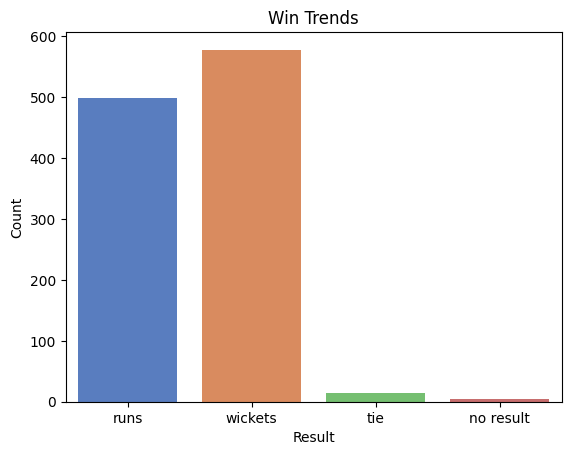

In [ ]:
sns.countplot(x='result', data=df2, palette='muted')
plt.title('Win Trends')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

## Analysis of Win Trends (Runs or Wickets) Visualization

*   This bar plot reveals that a majority of matches are won by **wickets** (578), indicating the significant role of bowling and fielding in securing victories.
*   Winning by runs is also frequent (498), but winning by chasing a target seems to be a more common outcome.
*   The number of ties and no results are minimal.

##  4. Most "Player of the Match" Awards (Top 20)

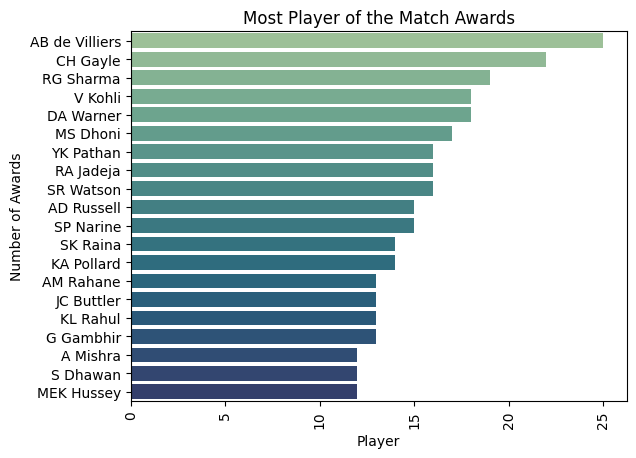

In [ ]:
sns.barplot(y=count.index, x=count.values, palette='crest')
plt.title('Most Player of the Match Awards')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.xticks(rotation=90)
plt.show()

## Analysis of Most 'Player of the Match' Awards Visualization

*   This bar plot showcases the players who have consistently delivered match-winning performances.
*   **AB de Villiers**, **Chris Gayle**, and **Rohit Sharma** are at the top, demonstrating their exceptional individual skills and impact on the game.
*   These players have frequently been recognized for their outstanding contributions.

## 5. Top venues by match count

Text(0, 0.5, 'Number of Matches')

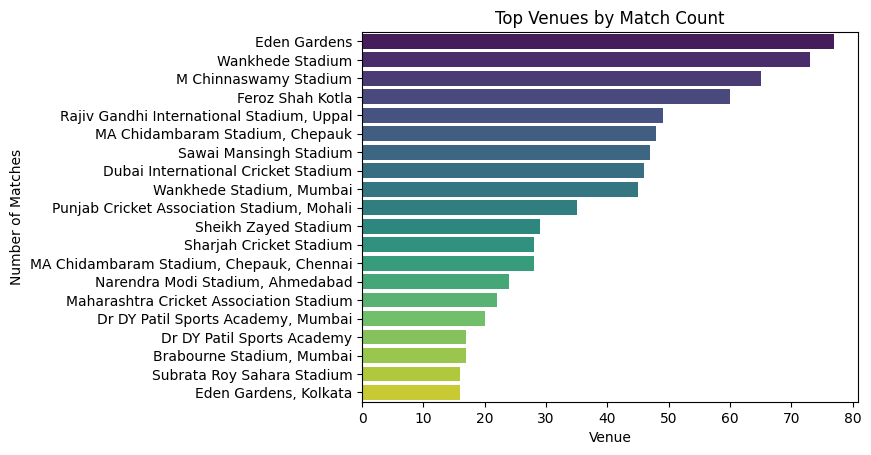

In [ ]:
sns.barplot(y=venue_counts.index, x=venue_counts.values, palette='viridis')
plt.title('Top Venues by Match Count')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')

## Analysis of Top Venues by Match Count Visualization

*   The bar plot identifies the stadiums that have hosted the highest number of IPL matches.
*   **Eden Gardens**, **Wankhede Stadium**, and **M Chinnaswamy Stadium** are the top venues, indicating their importance and capacity to host numerous games throughout the seasons.

## 6. Team wise win at a venue

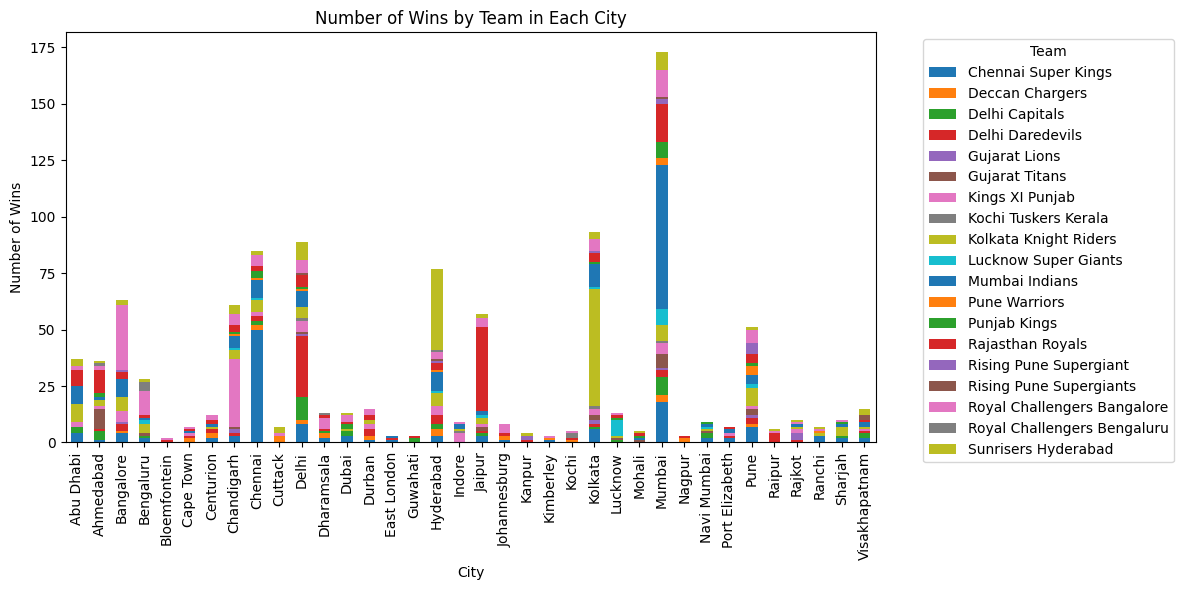

In [ ]:
city_team_wins.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Wins by Team in Each City')
plt.xlabel('City')
plt.ylabel('Number of Wins')

plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Analysis of Team Wise Win at a Venue Visualization

*   This stacked bar chart provides a detailed breakdown of how each team has performed in different cities.
*   It allows us to see which teams have a strong record in specific venues and which cities have been favorable or challenging for certain teams.
*   This granular view helps understand team-venue dynamics.

## 7. Count matches per season

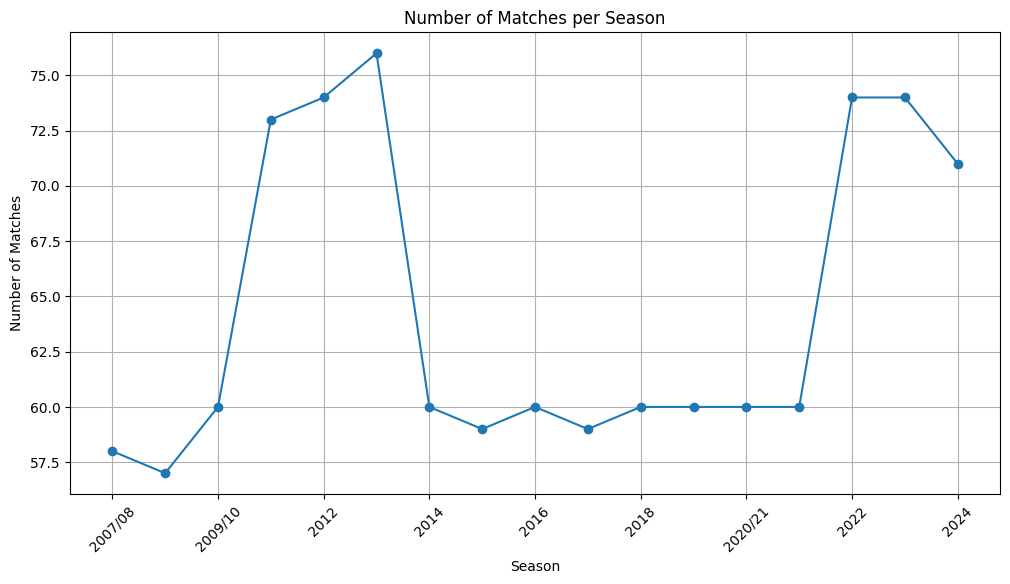

In [ ]:
plt.figure(figsize=(12, 6))
matches_per_season.plot(kind='line', marker='o')
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings
*   The number of matches played per IPL season varied, with seasons having as few as 58 matches (2009 and 2010) and as many as 94 matches (2022).
*   There is a general upward trend in the number of matches played per season over the years, indicating the growth of the league.

### Insights or Next Steps
*   The increase in the number of matches could be attributed to factors like the addition of new teams or changes in the tournament format. Analyzing team expansions and format changes alongside this data could provide deeper insights.


## 8. Most Match win by city

Text(0.5, 1.0, 'most match win by city')

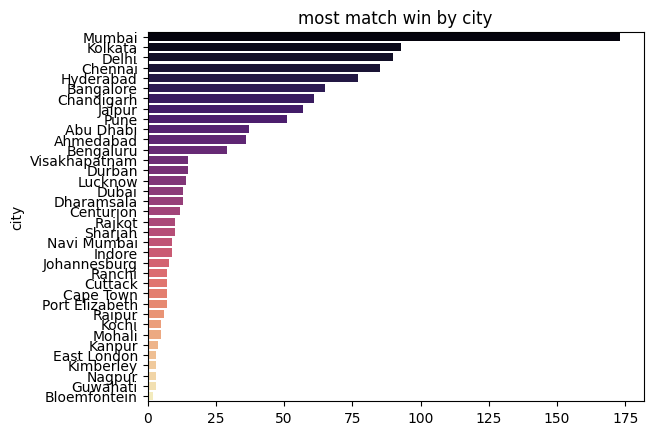

In [53]:
city_wins = df2['city'].value_counts()

sns.barplot(y = city_wins.index , x= city_wins.values,palette='magma')
plt.title("most match win by city")

## Analysis of Most Match Wins by City Visualization

*   The bar plot highlights the cities that have hosted and seen the most IPL victories.
*   **Mumbai** leads the list, followed by **Kolkata** and **Delhi**.
*   This suggests these cities have been key venues and possibly strongholds for home teams or popular destinations for high-stakes matches.

# Task
Create a histogram of the win margins for a specific team using the `df2` DataFrame.

## Select a team

### Subtask:
Choose the team for which you want to visualize the win margins.


**Reasoning**:
Select a team name from the available winners in the df2 DataFrame to proceed with visualizing win margins for that specific team.



In [ ]:
selected_team = 'Mumbai Indians'

## Filter data

### Subtask:
Filter the `df2` DataFrame to include only the matches won by the selected team.


**Reasoning**:
Filter the DataFrame to include only the matches won by the selected team.



In [ ]:
team_wins = df2[df2['winner'] == selected_team]
display(team_wins.head())

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
15,335997,2007/08,Kolkata,2008-04-29,League,ST Jayasuriya,Eden Gardens,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,Mumbai Indians,wickets,7.0,138.0,20.0,N,NaN,BF Bowden,AV Jayaprakash
22,336004,2007/08,Mumbai,2008-05-04,League,SM Pollock,Dr DY Patil Sports Academy,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,Mumbai Indians,runs,29.0,163.0,20.0,N,NaN,IL Howell,RE Koertzen
26,336008,2007/08,Mumbai,2008-05-07,League,A Nehra,Dr DY Patil Sports Academy,Mumbai Indians,Rajasthan Royals,Mumbai Indians,field,Mumbai Indians,wickets,7.0,104.0,20.0,N,NaN,DJ Harper,RE Koertzen
35,336018,2007/08,Mumbai,2008-05-14,League,ST Jayasuriya,Wankhede Stadium,Mumbai Indians,Chennai Super Kings,Mumbai Indians,field,Mumbai Indians,wickets,9.0,157.0,20.0,N,NaN,BR Doctrove,AM Saheba
37,336021,2007/08,Mumbai,2008-05-16,League,SM Pollock,Wankhede Stadium,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,wickets,8.0,68.0,20.0,N,NaN,BR Doctrove,DJ Harper


## Create histogram

### Subtask:
Generate a histogram of the `result_margin` column for the filtered data.


**Reasoning**:
Generate a histogram of the `result_margin` column for the filtered data to visualize the distribution of win margins for the selected team.



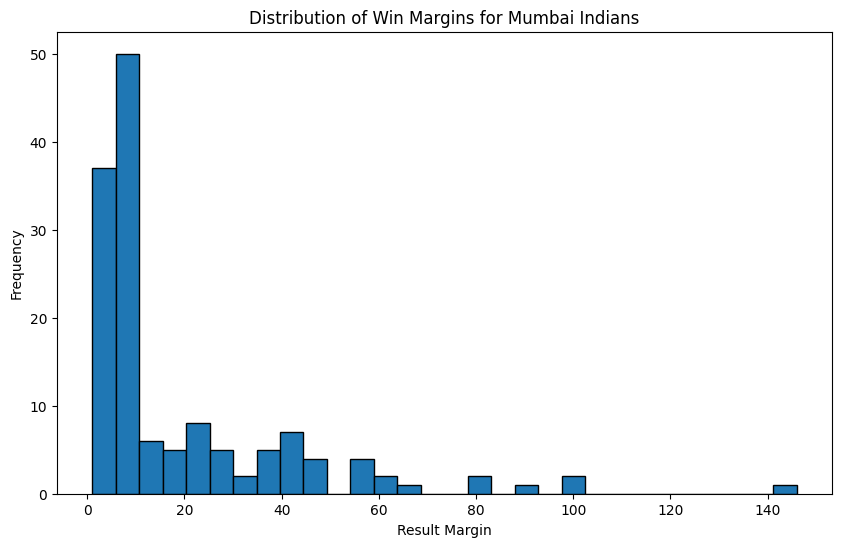

In [ ]:
plt.figure(figsize=(10, 6))
team_wins['result_margin'].hist(bins=30, edgecolor='black')
plt.title(f'Distribution of Win Margins for {selected_team}')
plt.xlabel('Result Margin')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Conclusion:

## Based on the visualizations:

*   **Team Performance:** Mumbai Indians have won the most matches, followed closely by Chennai Super Kings and Kolkata Knight Riders, indicating their consistent strong performance throughout the IPL seasons.
*   **Toss Influence:** The toss decision shows a clear preference for fielding first (64.3%), suggesting that teams often believe chasing a target is advantageous. However, the analysis of toss winners vs. match winners reveals that winning the toss only slightly increases the chance of winning the match (around 50.6%), indicating that other factors play a significant role in the outcome.
*   **Winning Margins:** Matches are more frequently won by wickets than by runs, highlighting the importance of bowling and fielding in restricting the opposition. There are fewer tie matches and no results.
*   **Popular Venues:** Eden Gardens, Wankhede Stadium, and M Chinnaswamy Stadium have hosted the highest number of matches, suggesting they are key venues for the tournament.
*   **Player Performance:** AB de Villiers, Chris Gayle, and Rohit Sharma have received the most 'Player of the Match' awards, recognizing their significant individual contributions to their teams' victories.
*   **Team Performance by City:** The stacked bar chart shows how different teams have performed in various cities, indicating some teams have stronger records in certain venues.
*   **Season Growth:** The line plot of matches per season shows the growth of the IPL over the years, with an increasing number of matches played in recent seasons.

**These insights provide a good overview of the IPL data and highlight key trends and patterns in team performance, toss decisions, winning margins, popular venues, and player contributions.**
